# Modeling Notebook


## 1. Import libraries

In [1]:
import pandas as pd
import numpy as np
import os 
%config Completer.use_jedi = False

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
os.sys.path.append('../src')

import experiments

## 2. Load Data

In [2]:
# df_raw = pd.read_excel('../data/survey_answers.xlsx', sheet_name='Dados_brutos')
df_raw = pd.read_csv('../data/data_am.txt', encoding = 'iso 8859-1', delimiter = '\t')
df_raw.head()

,Genero,Idade,Escolaridade,Estado_Civil,Filhos,Atividade_fisica_semana,Cigarros_dia,Horas_Dormidas_dia,Se_Capacitando,Outro_emprego,Ambiente_Trabalho,Categoria_Profissional,Tempo_Empresa_anos,Tempo_Funcao_anos,Horas_Trabalhadas_Semana,Pausas_Programadas_minutos,Trabalho_Entre_Ferias_meses,Recebeu_Treinamento,Como_foi_treinado,Trabalho_Chato,Trabalho_Organizado,Prazos_Apertados,Satisfacao_Gerencia,Satisfacao_Dificuldades,Tempo_Pe_horas,Tempo_Sentado_horas,Tempo_Corcoras_horas,Superiores_Desconfortavel_horas,Inferiores_Desconfortavel_horas,Tronco_Curvado_horas,Tronco_Torcido_horas,Maos_Dedos_horas,Movimentos_repetitivos_horas,Movimentos_Rapidos_horas,Ferramentas_Maos_horas,Ferramentas_Corpo_horas,dados.Costa_superior,dados.Costa_media,dados.Costa_inferior,bmi,carry_weight
0,1,36,3,2,2,0,0,6,2,2,2,1,8.0,3.0,36,30,11,2,1,1,5,5,5,4,11.0,0.5,0.0,0.0,0.0,1.0,0.0,12.0,12.0,12.0,1.0,0,1,1,1,15.418265,3.0
1,1,30,3,2,1,5,0,6,1,2,2,1,4.0,7.0,40,120,11,1,5,1,4,1,4,3,4.0,4.0,0.0,0.0,0.0,0.0,0.0,8.0,8.0,0.0,0.0,0,1,2,1,16.765737,0.0
2,1,40,3,2,3,0,0,10,1,2,1,1,8.0,12.0,36,60,11,1,4,1,5,1,4,3,6.0,6.0,0.0,0.0,0.0,0.0,0.0,12.0,12.0,3.0,0.0,0,2,1,1,19.297399,0.0
3,1,45,3,2,1,3,0,8,1,2,1,1,8.0,18.0,36,60,11,1,5,2,5,4,4,3,6.0,6.0,0.0,4.0,8.0,2.0,0.0,12.0,12.0,3.0,0.0,0,1,1,1,17.578125,0.0
4,1,41,5,1,2,5,0,7,2,2,1,1,4.0,4.0,36,0,11,1,3,1,5,3,4,4,11.0,1.0,1.0,10.0,10.0,0.0,0.0,12.0,12.0,10.0,0.0,0,1,1,1,15.943878,3.0


In [3]:
continous_columns = [
                    'Idade', 
                     'bmi',
                     'Filhos',
                     'Atividade_fisica_semana',
                     'Cigarros_dia',
                     'Horas_Dormidas_dia',
                     'Tempo_Empresa_anos',
                    #'Horas_Trabalhadas_Dia',
                    'Tempo_Funcao_anos',
                     'Horas_Trabalhadas_Semana',
                     'Pausas_Programadas_minutos',
                    'Trabalho_Entre_Ferias_meses',
                    'Tempo_Pe_horas',
                    'Tempo_Sentado_horas',
                    'Tempo_Corcoras_horas',
                    'Superiores_Desconfortavel_horas',
                    'Inferiores_Desconfortavel_horas',
                    'Tronco_Curvado_horas',
                    'Tronco_Torcido_horas',
                    'Maos_Dedos_horas',
                    'carry_weight',
                    'Movimentos_repetitivos_horas',
                    'Movimentos_Rapidos_horas',
                    'Ferramentas_Maos_horas',
                    'Ferramentas_Corpo_horas'
                    ]
categorical_columns = ['Genero',
                       'Estado_Civil',
                       'Se_Capacitando',
                       'Outro_emprego',
                       'Ambiente_Trabalho',
                       'Categoria_Profissional',
                       'Recebeu_Treinamento',
                       'Como_foi_treinado',
                       'Escolaridade',
                       'Trabalho_Chato',
                       'Trabalho_Organizado',
                       'Prazos_Apertados',
                       'Satisfacao_Gerencia',
                       'Satisfacao_Dificuldades'
                       ]
target_columns = ['dados.Costa_superior', 'dados.Costa_media', 'dados.Costa_inferior']

useful_columns = continous_columns + categorical_columns + target_columns

In [4]:
df_raw.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 41 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Genero                           398 non-null    int64  
 1   Idade                            398 non-null    int64  
 2   Escolaridade                     398 non-null    int64  
 3   Estado_Civil                     398 non-null    int64  
 4   Filhos                           398 non-null    int64  
 5   Atividade_fisica_semana          398 non-null    int64  
 6   Cigarros_dia                     398 non-null    int64  
 7   Horas_Dormidas_dia               398 non-null    int64  
 8   Se_Capacitando                   398 non-null    int64  
 9   Outro_emprego                    398 non-null    int64  
 10  Ambiente_Trabalho                398 non-null    int64  
 11  Categoria_Profissional           398 non-null    int64  
 12  Tempo_Empresa_anos    

## 3. Feature Engineering

In [5]:
df_analysis = df_raw[useful_columns].copy()
# df_analysis['IMC'] = df_analysis['Peso']/df_analysis['Altura']**2

In [6]:
def bmi_category(bmi_value):
    if bmi_value < 18:
        return 'underweight'
    elif bmi_value >= 18 and bmi_value <= 24:
        return 'normal'
    elif bmi_value > 24 and bmi_value <= 28:
        return 'overweight'
    elif bmi_value > 28:
        return 'obese'
    else:
        return 'error'

In [7]:
df_analysis.insert(loc = 1, column = 'bmi_category', value = df_analysis['bmi'].apply(bmi_category))

In [8]:
# df_analysis.insert(loc = 1, 
#                    column = 'Horas_Carregando_Carga', 
#                    value = df_analysis['Carga_6_horas'] + df_analysis['Carga_15_horas'] + df_analysis['Carga_25_horas'])

In [9]:
df_analysis[target_columns[0]].value_counts()

1    177
2    158
3     63
Name: dados.Costa_superior, dtype: int64

In [10]:
df_analysis[target_columns[1]].value_counts()

1    187
2    144
3     67
Name: dados.Costa_media, dtype: int64

In [11]:
df_analysis[target_columns[2]].value_counts(normalize = True)

1    0.427136
2    0.389447
3    0.183417
Name: dados.Costa_inferior, dtype: float64

## 4. Target definition

In [12]:
def target_grouping(score):
    if score >= 4:
        return 'severe pain'
    elif score in [2,3]:
        return 'mild pain'
    else:
        return 'no pain'
    
def make_binary(score):
    if score >= 2:
        return 'pain'
    else:
        return 'no pain'

In [13]:
df_analysis['Costa_superior_binary'] = df_analysis[target_columns[0]].apply(make_binary)
df_analysis['Costa_media_binary'] = df_analysis[target_columns[1]].apply(make_binary)
df_analysis['Costa_inferior_binary'] = df_analysis[target_columns[2]].apply(make_binary)

## 5. Feature Selection

We'll fit a Random Forest model and will use its feature importance values to select the most relevant features.

- [Article](https://johaupt.github.io/blog/columnTransformer_feature_names.html) with wraper function to get feature names

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import KBinsDiscretizer, StandardScaler, OneHotEncoder

target_columns = ['Costa_superior_binary', 'Costa_media_binary', 'Costa_inferior_binary']

X = df_analysis.drop(columns = target_columns)
y = df_analysis[target_columns]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessing = ColumnTransformer(
    transformers = [
        ('num', numerical_transformer, experiments.continous_columns),
        ('cat', categorical_transformer, experiments.categorical_columns)
    ])

model1 = DecisionTreeClassifier(random_state = 42)
model2 = DecisionTreeClassifier(random_state = 42)
model3 = DecisionTreeClassifier(random_state = 42)


X_train_preprocessed = preprocessing.fit_transform(X_train)

# One model for each target
selector_upper_back = model1.fit(X_train_preprocessed, y_train[target_columns[0]])
selector_mid_back = model2.fit(X_train_preprocessed, y_train[target_columns[1]])
selector_lower_back = model3.fit(X_train_preprocessed, y_train[target_columns[2]])

In [15]:
import sklearn
import warnings
def get_feature_names(column_transformer):
    """Get feature names from all transformers.
    Returns
    -------
    feature_names : list of strings
        Names of the features produced by transform.
    """
    # Remove the internal helper function
    #check_is_fitted(column_transformer)
    
    # Turn loopkup into function for better handling with pipeline later
    def get_names(trans):
        # >> Original get_feature_names() method
        if trans == 'drop' or (
                hasattr(column, '__len__') and not len(column)):
            return []
        if trans == 'passthrough':
            if hasattr(column_transformer, '_df_columns'):
                if ((not isinstance(column, slice))
                        and all(isinstance(col, str) for col in column)):
                    return column
                else:
                    return column_transformer._df_columns[column]
            else:
                indices = np.arange(column_transformer._n_features)
                return ['x%d' % i for i in indices[column]]
        if not hasattr(trans, 'get_feature_names'):
        # >>> Change: Return input column names if no method avaiable
            # Turn error into a warning
            warnings.warn("Transformer %s (type %s) does not "
                                 "provide get_feature_names. "
                                 "Will return input column names if available"
                                 % (str(name), type(trans).__name__))
            # For transformers without a get_features_names method, use the input
            # names to the column transformer
            if column is None:
                return []
            else:
                return [name + "__" + f for f in column]

        return [name + "__" + f for f in trans.get_feature_names()]
    
    ### Start of processing
    feature_names = []
    
    # Allow transformers to be pipelines. Pipeline steps are named differently, so preprocessing is needed
    if type(column_transformer) == sklearn.pipeline.Pipeline:
        l_transformers = [(name, trans, None, None) for step, name, trans in column_transformer._iter()]
    else:
        # For column transformers, follow the original method
        l_transformers = list(column_transformer._iter(fitted=True))
    
    
    for name, trans, column, _ in l_transformers: 
        if type(trans) == sklearn.pipeline.Pipeline:
            # Recursive call on pipeline
            _names = get_feature_names(trans)
            # if pipeline has no transformer that returns names
            if len(_names)==0:
                _names = [name + "__" + f for f in column]
            feature_names.extend(_names)
        else:
            feature_names.extend(get_names(trans))
    
    return feature_names

### 5.1 Upper Back

In [16]:
feature_importance_upper_back = pd.DataFrame({'feature_name': get_feature_names(preprocessing),
                                              'feature_importance': np.round(selector_upper_back.feature_importances_, 4)
                                             })\
                                .sort_values(by =['feature_importance'], ascending = False)
feature_importance_upper_back.head(10)

C:\Users\56325\AppData\Local\Temp\ipykernel_8056\733556529.py:32: UserWarning: Transformer imputer (type SimpleImputer) does not provide get_feature_names. Will return input column names if available
  warnings.warn("Transformer %s (type %s) does not "
C:\Users\56325\AppData\Local\Temp\ipykernel_8056\733556529.py:32: UserWarning: Transformer scaler (type StandardScaler) does not provide get_feature_names. Will return input column names if available
  warnings.warn("Transformer %s (type %s) does not "
C:\Users\56325\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,feature_name,feature_importance
12,num__Tempo_Sentado_horas,0.0791
7,num__Tempo_Funcao_anos,0.0741
19,num__carry_weight,0.0598
21,num__Movimentos_Rapidos_horas,0.0518
50,encoder__x8_6,0.0498
1,num__bmi,0.0473
68,encoder__x12_2,0.0392
6,num__Tempo_Empresa_anos,0.0372
10,num__Trabalho_Entre_Ferias_meses,0.0354
15,num__Inferiores_Desconfortavel_horas,0.0297


In [17]:
feature_importance_upper_back.head(10)['feature_name'].tolist()

['num__Tempo_Sentado_horas',
 'num__Tempo_Funcao_anos',
 'num__carry_weight',
 'num__Movimentos_Rapidos_horas',
 'encoder__x8_6',
 'num__bmi',
 'encoder__x12_2',
 'num__Tempo_Empresa_anos',
 'num__Trabalho_Entre_Ferias_meses',
 'num__Inferiores_Desconfortavel_horas']

In [18]:
feature_importance_upper_back.head(10)['feature_importance'].sum()

0.5034

In [19]:
experiments.categorical_columns[12]

'Satisfacao_Gerencia'

### 5.2 Mid Back

In [20]:
feature_importance_mid_back = pd.DataFrame({'feature_name': get_feature_names(preprocessing),
                                              'feature_importance': np.round(selector_mid_back.feature_importances_, 4)
                                             })\
                                .sort_values(by =['feature_importance'], ascending = False)
feature_importance_mid_back.head(10)

C:\Users\56325\AppData\Local\Temp\ipykernel_8056\733556529.py:32: UserWarning: Transformer imputer (type SimpleImputer) does not provide get_feature_names. Will return input column names if available
  warnings.warn("Transformer %s (type %s) does not "
C:\Users\56325\AppData\Local\Temp\ipykernel_8056\733556529.py:32: UserWarning: Transformer scaler (type StandardScaler) does not provide get_feature_names. Will return input column names if available
  warnings.warn("Transformer %s (type %s) does not "
C:\Users\56325\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,feature_name,feature_importance
6,num__Tempo_Empresa_anos,0.1148
7,num__Tempo_Funcao_anos,0.0809
18,num__Maos_Dedos_horas,0.0718
12,num__Tempo_Sentado_horas,0.0619
20,num__Movimentos_repetitivos_horas,0.0554
5,num__Horas_Dormidas_dia,0.0471
11,num__Tempo_Pe_horas,0.0415
60,encoder__x10_4,0.0401
15,num__Inferiores_Desconfortavel_horas,0.0378
16,num__Tronco_Curvado_horas,0.0348


### 5.3 Lower Back

In [21]:
feature_importance_lower_back = pd.DataFrame({'feature_name': get_feature_names(preprocessing),
                                              'feature_importance': np.round(selector_lower_back.feature_importances_, 4)
                                             })\
                                .sort_values(by =['feature_importance'], ascending = False)
feature_importance_lower_back.head(11)

C:\Users\56325\AppData\Local\Temp\ipykernel_8056\733556529.py:32: UserWarning: Transformer imputer (type SimpleImputer) does not provide get_feature_names. Will return input column names if available
  warnings.warn("Transformer %s (type %s) does not "
C:\Users\56325\AppData\Local\Temp\ipykernel_8056\733556529.py:32: UserWarning: Transformer scaler (type StandardScaler) does not provide get_feature_names. Will return input column names if available
  warnings.warn("Transformer %s (type %s) does not "
C:\Users\56325\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,feature_name,feature_importance
1,num__bmi,0.1200
6,num__Tempo_Empresa_anos,0.0857
19,num__carry_weight,0.0640
61,encoder__x10_5,0.0563
5,num__Horas_Dormidas_dia,0.0558
69,encoder__x12_3,0.0543
18,num__Maos_Dedos_horas,0.0397
59,encoder__x10_3,0.0384
0,num__Idade,0.0375
7,num__Tempo_Funcao_anos,0.0371


In [22]:
feature_importance_lower_back.head(10)['feature_name'].tolist()

['num__bmi',
 'num__Tempo_Empresa_anos',
 'num__carry_weight',
 'encoder__x10_5',
 'num__Horas_Dormidas_dia',
 'encoder__x12_3',
 'num__Maos_Dedos_horas',
 'encoder__x10_3',
 'num__Idade',
 'num__Tempo_Funcao_anos']

In [23]:
feature_importance_lower_back.head(10)['feature_importance'].sum()

0.5888

In [24]:
selected_features = feature_importance_upper_back.head(10)['feature_name'].tolist()
selected_features.extend(feature_importance_mid_back.head(10)['feature_name'].tolist())
selected_features.extend(feature_importance_lower_back.head(10)['feature_name'].tolist())
selected_features = list(set(selected_features))
selected_features

['num__Tempo_Funcao_anos',
 'num__Tempo_Sentado_horas',
 'encoder__x12_2',
 'encoder__x12_3',
 'num__bmi',
 'num__Tempo_Pe_horas',
 'num__Movimentos_Rapidos_horas',
 'num__Idade',
 'encoder__x8_6',
 'num__Tronco_Curvado_horas',
 'num__Movimentos_repetitivos_horas',
 'num__Trabalho_Entre_Ferias_meses',
 'num__Tempo_Empresa_anos',
 'num__carry_weight',
 'num__Horas_Dormidas_dia',
 'num__Inferiores_Desconfortavel_horas',
 'encoder__x10_3',
 'encoder__x10_4',
 'num__Maos_Dedos_horas',
 'encoder__x10_5']

In [25]:
experiments.categorical_columns[12]

'Satisfacao_Gerencia'

In [26]:
selected_features  = [
    'Tempo_Funcao_anos',
    'Horas_Dormidas_dia',
    'Movimentos_Rapidos_horas',
    'Tempo_Sentado_horas',
    'bmi',
    'carry_weight',
    'Inferiores_Desconfortavel_horas',
    'Trabalho_Organizado',
    'Tempo_Empresa_anos',
    'Maos_Dedos_horas',
    'Trabalho_Entre_Ferias_meses',
    'Tempo_Pe_horas',
    'Idade',
    'Tronco_Curvado_horas',
    'Movimentos_repetitivos_horas',
    'Satisfacao_Gerencia',
    'Escolaridade'
 ]

In [27]:
selected_categorical = list(set(experiments.categorical_columns).intersection(selected_features))
selected_continous = list(set(experiments.continous_columns).intersection(selected_features))

In [28]:
print(selected_categorical)
print(selected_continous)

['Satisfacao_Gerencia', 'Escolaridade', 'Trabalho_Organizado']
['Horas_Dormidas_dia', 'Idade', 'Trabalho_Entre_Ferias_meses', 'Tempo_Empresa_anos', 'Inferiores_Desconfortavel_horas', 'Tronco_Curvado_horas', 'carry_weight', 'Movimentos_repetitivos_horas', 'Movimentos_Rapidos_horas', 'Tempo_Funcao_anos', 'Maos_Dedos_horas', 'bmi', 'Tempo_Sentado_horas', 'Tempo_Pe_horas']


## 6. Train and test split
We'll split the data into train and test set. The train set will be used to perform 10-fold cross validation. We'll compute metrics for the test set and compare them.

In [29]:
from sklearn.model_selection import train_test_split
target_columns = ['Costa_superior_binary', 'Costa_media_binary', 'Costa_inferior_binary']

X = df_analysis[experiments.selected_continous + experiments.selected_categorical]
y = df_analysis[target_columns]

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
X_train = X
y_train = y

## 7. Experiments

- [Article](https://towardsdatascience.com/quickly-test-multiple-models-a98477476f0) used as reference to wrap code.

### 7.1. Upper Back

In [30]:
scorer = experiments.scorers
algorithms = experiments.build_algorithms()
cv = experiments.cv
target_names = y_train[target_columns[0]].unique()

In [31]:
from sklearn.model_selection import cross_val_score, cross_validate

def get_cv_results(algorithms, X, y, cv, scorers):
    result = {}
    result_df = pd.DataFrame()
    for alg, clf in algorithms.items():
        result[alg] = cross_validate(clf, X, y, cv=cv, scoring=scorers, return_estimator = True)
        df = pd.DataFrame(result[alg])
        df['model'] = alg
        
        result_df = pd.concat([result_df, df])

    # result = pd.DataFrame.from_dict(result[alg])
    return result_df

upper_back_cv_results = get_cv_results(algorithms, X, y[target_columns[0]], cv, experiments.scorers)
upper_back_cv_results

C:\Users\56325\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\56325\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\56325\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\56325\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedM

,fit_time,score_time,estimator,test_precision,test_recall,test_f1,test_accuracy,model
0,0.001611,0.009294,DummyClassifier(strategy='most_frequent'),0.302500,0.550000,0.390323,0.550000,dummy
1,0.000000,0.005094,DummyClassifier(strategy='most_frequent'),0.302500,0.550000,0.390323,0.550000,dummy
2,0.001015,0.003948,DummyClassifier(strategy='most_frequent'),0.302500,0.550000,0.390323,0.550000,dummy
3,0.000238,0.006059,DummyClassifier(strategy='most_frequent'),0.302500,0.550000,0.390323,0.550000,dummy
4,0.000995,0.002346,DummyClassifier(strategy='most_frequent'),0.302500,0.550000,0.390323,0.550000,dummy
5,0.000000,0.010244,DummyClassifier(strategy='most_frequent'),0.302500,0.550000,0.390323,0.550000,dummy
6,0.001994,0.007288,DummyClassifier(strategy='most_frequent'),0.302500,0.550000,0.390323,0.550000,dummy
7,0.000998,0.007054,DummyClassifier(strategy='most_frequent'),0.330625,0.575000,0.419841,0.575000,dummy
8,0.001993,0.004268,DummyClassifier(strategy='most_frequent'),0.318212,0.564103,0.406894,0.564103,dummy
9,0.001105,0.006079,DummyClassifier(strategy='most_frequent'),0.318212,0.564103,0.406894,0.564103,dummy


In [32]:
def report_results(results):
    pivot = \
    results.pivot_table(index = 'model',
                          aggfunc = ['mean', 'std'])
    return np.round(pivot, 2)

In [33]:
report_results(upper_back_cv_results.drop(columns = ['fit_time', 'score_time']))

mean                                              std  \
          test_accuracy test_f1 test_precision test_recall test_accuracy   
model                                                                      
ann                0.59    0.58           0.58        0.59          0.06   
dummy              0.56    0.40           0.31        0.56          0.01   
kNN                0.58    0.57           0.57        0.58          0.07   
nb_1st             0.59    0.57           0.59        0.59          0.04   
svmlinear          0.55    0.52           0.53        0.55          0.07   
tree               0.56    0.55           0.55        0.56          0.09   

                                              
          test_f1 test_precision test_recall  
model                                         
ann          0.07           0.07        0.06  
dummy        0.01           0.01        0.01  
kNN          0.07           0.07        0.07  
nb_1st       0.05           0.04        0.04  
svmlinear    0.07           0.07        0.07  
tree         0.09           0.09        0.09

**Best params of each model**

In [34]:
def get_best_model(results, metrics_sorting):
    best_model = dict()
    for model in results['model'].unique():
        df = results[results['model'] == model]
        sorted_df = df.sort_values(by = metrics_sorting, ascending = False)
        
        best_model[model] = sorted_df.loc[0, 'estimator']
    return best_model

In [35]:
def print_best_params(best_model):
    for alg, clf in best_model.items():
        try:
            print(f'{alg}', clf.best_params_)
        except:
            print(f'{alg} has no best params')

In [36]:
upper_back_best_models = get_best_model(upper_back_cv_results, ['test_recall'])
print_best_params(upper_back_best_models)

dummy has no best params
kNN {'knn__n_neighbors': 3, 'knn__p': 1}
tree {'tree__criterion': 'gini', 'tree__max_depth': 5}
nb_1st {'nb__var_smoothing': 1e-09}
svmlinear {'svm__C': 1.0}
ann {}


### 7.2. Mid Back

In [37]:
target_column = target_columns[1]
mid_back_cv_results = get_cv_results(algorithms, X, y[target_column], cv, experiments.scorers)
agg_results_mid_back = report_results(mid_back_cv_results.drop(columns = ['fit_time', 'score_time']))
agg_results_mid_back

C:\Users\56325\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\56325\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\56325\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\56325\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedM

mean                                              std  \
          test_accuracy test_f1 test_precision test_recall test_accuracy   
model                                                                      
ann                0.60    0.59           0.60        0.60          0.07   
dummy              0.53    0.37           0.28        0.53          0.01   
kNN                0.58    0.58           0.59        0.58          0.06   
nb_1st             0.56    0.55           0.56        0.56          0.09   
svmlinear          0.56    0.56           0.56        0.56          0.09   
tree               0.55    0.55           0.56        0.55          0.05   

                                              
          test_f1 test_precision test_recall  
model                                         
ann          0.07           0.07        0.07  
dummy        0.01           0.01        0.01  
kNN          0.06           0.07        0.06  
nb_1st       0.10           0.10        0.09  
svmlinear    0.09           0.09        0.09  
tree         0.05           0.05        0.05

In [38]:
mid_back_best_models = get_best_model(mid_back_cv_results, ['test_recall'])
print_best_params(mid_back_best_models)

dummy has no best params
kNN {'knn__n_neighbors': 3, 'knn__p': 1}
tree {'tree__criterion': 'gini', 'tree__max_depth': 10}
nb_1st {'nb__var_smoothing': 1e-09}
svmlinear {'svm__C': 2.0}
ann {}


### 7.3. Low Back

In [39]:
target_column = target_columns[2]
lower_back_cv_results = get_cv_results(algorithms, X, y[target_column], cv, experiments.scorers)
agg_results_lower_back = report_results(lower_back_cv_results.drop(columns = ['fit_time', 'score_time']))
agg_results_lower_back

C:\Users\56325\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\56325\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\56325\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\56325\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedM

mean                                              std  \
          test_accuracy test_f1 test_precision test_recall test_accuracy   
model                                                                      
ann                0.63    0.62           0.63        0.63          0.06   
dummy              0.57    0.42           0.33        0.57          0.00   
kNN                0.62    0.61           0.62        0.62          0.05   
nb_1st             0.64    0.63           0.64        0.64          0.05   
svmlinear          0.63    0.61           0.63        0.63          0.07   
tree               0.62    0.61           0.62        0.62          0.05   

                                              
          test_f1 test_precision test_recall  
model                                         
ann          0.07           0.08        0.06  
dummy        0.01           0.01        0.00  
kNN          0.05           0.06        0.05  
nb_1st       0.05           0.05        0.05  
svmlinear    0.08           0.09        0.07  
tree         0.05           0.05        0.05

In [40]:
lower_back_best_models = get_best_model(lower_back_cv_results, ['test_recall'])
print_best_params(lower_back_best_models)

dummy has no best params
kNN {'knn__n_neighbors': 3, 'knn__p': 1}
tree {'tree__criterion': 'entropy', 'tree__max_depth': 10}
nb_1st {'nb__var_smoothing': 1e-09}
svmlinear {'svm__C': 2.0}
ann {}


## 8. Performance Comparison

- [Article](https://medium.com/mlearning-ai/comparing-classifiers-friedman-and-nemenyi-tests-32294103ee12) explaining Friedman and Nemenyi testes for ML
- [PDF from USP](https://edisciplinas.usp.br/pluginfile.php/4129451/mod_resource/content/1/model_selection_evaluation.pdf)
- [Geeks for Geeks](https://www.geeksforgeeks.org/how-to-perform-the-nemenyi-test-in-python/)

### 8.1 Best model for Upper back pain classification

In [41]:
from scipy import stats


def split_raw_results(raw_results, metric_name):
    metrics_list = list()
    
    for model_name in raw_results['model'].unique():
        if model_name != 'dummy':
            metrics = raw_results[raw_results['model'] == model_name].reset_index()[metric_name]
            metrics.name = model_name
            metrics_list.append(metrics)
    return metrics_list

alpha = 0.05
performances = split_raw_results(upper_back_cv_results, 'test_recall')
stats.friedmanchisquare(*performances)

FriedmanchisquareResult(statistic=3.2164948453608293, pvalue=0.5222708727071748)

Nao ha significancia estatistica. 

In [42]:
from scipy.stats import wilcoxon, friedmanchisquare, rankdata
from Orange.evaluation import compute_CD, graph_ranks
import matplotlib.pyplot as plt

In [43]:
ranks = np.array([rankdata(-p) for p in performances])
algorithm_names = pd.concat(performances, axis = 1).columns
# Calculating the average ranks.
average_ranks = np.mean(ranks, axis=1)
print('\n'.join('{} average rank: {}'.format(a, np.round(r, 2)) for a, r in zip(algorithm_names, average_ranks)))

kNN average rank: 5.5
tree average rank: 5.5
nb_1st average rank: 5.5
svmlinear average rank: 5.5
ann average rank: 5.5


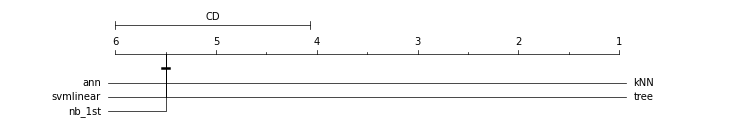

In [44]:
cd = compute_CD(average_ranks,
        n=10,
        alpha='0.05',
        test='nemenyi')

# This method generates the plot.
graph_ranks(average_ranks,
    names=algorithm_names,
    cd=cd,
    width=10,
    textspace=1.5,
    reverse=True
)
plt.show()

In [45]:
import scikit_posthocs as sp

friedman_pvalue = sp.posthoc_nemenyi_friedman(pd.concat(performances, axis = 1))
friedman_pvalue

,kNN,tree,nb_1st,svmlinear,ann
kNN,1.000000,0.900000,0.763265,0.900000,0.900000
tree,0.900000,1.000000,0.763265,0.900000,0.900000
nb_1st,0.763265,0.763265,1.000000,0.522486,0.900000
svmlinear,0.900000,0.900000,0.522486,1.000000,0.763265
ann,0.900000,0.900000,0.900000,0.763265,1.000000


### 8.2 Best model for Mid back pain classification

In [46]:
alpha = 0.05
performances = split_raw_results(mid_back_cv_results, 'test_recall')
stats.friedmanchisquare(*performances)

FriedmanchisquareResult(statistic=5.240641711229952, pvalue=0.2634851683827737)

Nao ha diferenca estatistica

### 8.3 Best model for Lower back pain classification

In [47]:
alpha = 0.05
performances = split_raw_results(lower_back_cv_results, 'test_recall')
stats.friedmanchisquare(*performances)

FriedmanchisquareResult(statistic=1.7237569060773505, pvalue=0.7863977636365335)

Nao ha diferenca estatistica

## 9. Feature Analysis

In [48]:
# import shap
# model = algorithms['svmlinear']
# X_test
# # Fits the explainer
# explainer = shap.Explainer(model.predict, X_test)
# # Calculates the SHAP values - It takes some time
# shap_values = explainer(X_test)